In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob

import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
data = pd.read_csv('/project/time_series/cv_id.csv')
data

,Model,sampling_way,target_sr,acc,recall,precision,f1,auc_score
0,fan_0_id_00,abs_max(our_custom),64,0.503,0.373,0.252,0.301,0.431
1,fan_0_id_00,abs_max(our_custom),80,0.489,0.361,0.241,0.289,0.420
2,fan_0_id_00,abs_max(our_custom),100,0.500,0.359,0.246,0.292,0.420
3,fan_0_id_00,abs_max(our_custom),125,0.494,0.349,0.239,0.283,0.395
4,fan_0_id_00,abs_max(our_custom),128,0.483,0.376,0.242,0.295,0.408
...,...,...,...,...,...,...,...,...
1339,fan_0_id_06,soxr_qq,3200,0.744,0.205,0.532,0.296,0.337
1340,fan_0_id_06,soxr_qq,4000,0.762,0.199,0.649,0.305,0.344
1341,fan_0_id_06,soxr_qq,8000,0.759,0.183,0.647,0.285,0.338
1342,fan_0_id_06,soxr_qq,10000,0.761,0.183,0.660,0.286,0.325


In [3]:
def make_Object(x):
    if x[:6] == 'fan_0_':
        object = '0'
    elif x[:6] == 'fan_6_':
        object = '6'
    else :
        object = '_6'
    return object

data['Noise'] = data['Model'].apply(make_Object)
data['Object'] = data['Model'].apply(lambda x : x.split('_')[0])
data['Model'] = data['Model'].apply(lambda x : x[-5:])
data = data[['Object','Noise', 'Model', 'sampling_way', 'target_sr', 'acc', 'recall', 'precision','f1', 'auc_score']]
data.head()

,Object,Noise,Model,sampling_way,target_sr,acc,recall,precision,f1,auc_score
0,fan,0,id_00,abs_max(our_custom),64,0.503,0.373,0.252,0.301,0.431
1,fan,0,id_00,abs_max(our_custom),80,0.489,0.361,0.241,0.289,0.420
2,fan,0,id_00,abs_max(our_custom),100,0.500,0.359,0.246,0.292,0.420
3,fan,0,id_00,abs_max(our_custom),125,0.494,0.349,0.239,0.283,0.395
4,fan,0,id_00,abs_max(our_custom),128,0.483,0.376,0.242,0.295,0.408


In [4]:
## Noise 고정
Noise = '0'

##Model은 변경 하면서 하기 
Model = 'id_00'

data_ = data[(data['Noise'] == Noise) & (data['Model'] == Model)]
sample_li = list(set(data_['sampling_way']))
sample_li

['linear',
 'sinc_best',
 'scipy',
 'kaiser_best',
 'zero_order_hold',
 'polyphase',
 'soxr_lq',
 'soxr_vhq',
 'soxr_mq',
 'sinc_fastest',
 'abs_max(our_custom)',
 'soxr_hq',
 'kaiser_fast',
 'soxr_qq',
 'sinc_medium',
 'fft']

In [5]:

def fan0_per_model(model):
    ## Noise 고정
    Noise = '0'

    ##Model은 변경 하면서 하기 
    Model = model


    data_ = data[(data['Noise'] == Noise) & (data['Model'] == Model)]




    color_li = ['bisque', 'darkorange', 'burlywood', 'antiquewhite', 'gold', 'olive', 'yellow', 'ivory', 'lawngreen','rosybrown','coral',
                'chocolate', 'green', 'mediumturquoise', 'deepskyblue', 'indigo']

    sample_li = sorted(list(set(data_['sampling_way'])))
    target_sr_li = sorted(list(set(data['target_sr'])))

    fig = plt.figure(figsize=(20,8), dpi=300)
    ax = fig.subplots(1,2)

    legend_li = []
    maxind_li = []
    maxvalue_li = []

    for sample_way, color in zip(sample_li, color_li) : 
        data_new = data_[data_['sampling_way'] == sample_way]
        sns.pointplot(x = 'target_sr', y='f1',data = data_new ,label='{}'.format(sample_way),color=color, ax=ax[0])
        legend_li.append(mpatches.Patch(color=color,label='{}'.format(sample_way)))
        
        maxind = np.argmax(data_new['f1'])
        maxind_li.append(maxind)
        
        maxvalue = np.max(data_new['f1'])
        maxvalue_li.append(maxvalue)
        
        ax[0].axvline(maxind, color=color, linestyle='--', linewidth=2)
#         print(maxind)
#         print(maxvalue)

    _=ax[0].legend(handles=legend_li, loc='upper right',bbox_to_anchor=(1.25,1), fontsize=8)
    _=ax[0].set_ylabel('f1_score', fontsize=15)
    _=ax[0].set_xlabel('target_sr', fontsize=15)
    _=ax[0].set_ylim([0,1.2])

    _=ax[0].set_xticklabels(target_sr_li, fontsize=15, rotation=45)
    _=ax[0].tick_params(axis='y', labelsize=15)
    _=ax[0].set_title('{}'.format(Model), fontsize=30)
    
    ############################    ax[1]    ##############################
    
    _=ax[1].bar(range(len(maxind_li)), maxvalue_li, color=color_li)
    
    for ii, ind in enumerate(maxind_li) :
        ax[1].text(ii, maxvalue_li[ii], '{}'.format(target_sr_li[ind]), ha='left', va='bottom', fontsize=15)
    _=ax[1].set_title('Best', fontsize=30)
    _=ax[1].set_xticks(range(len(maxvalue_li)))
    _=ax[1].set_xticklabels(sample_li, fontsize=13, rotation=45)

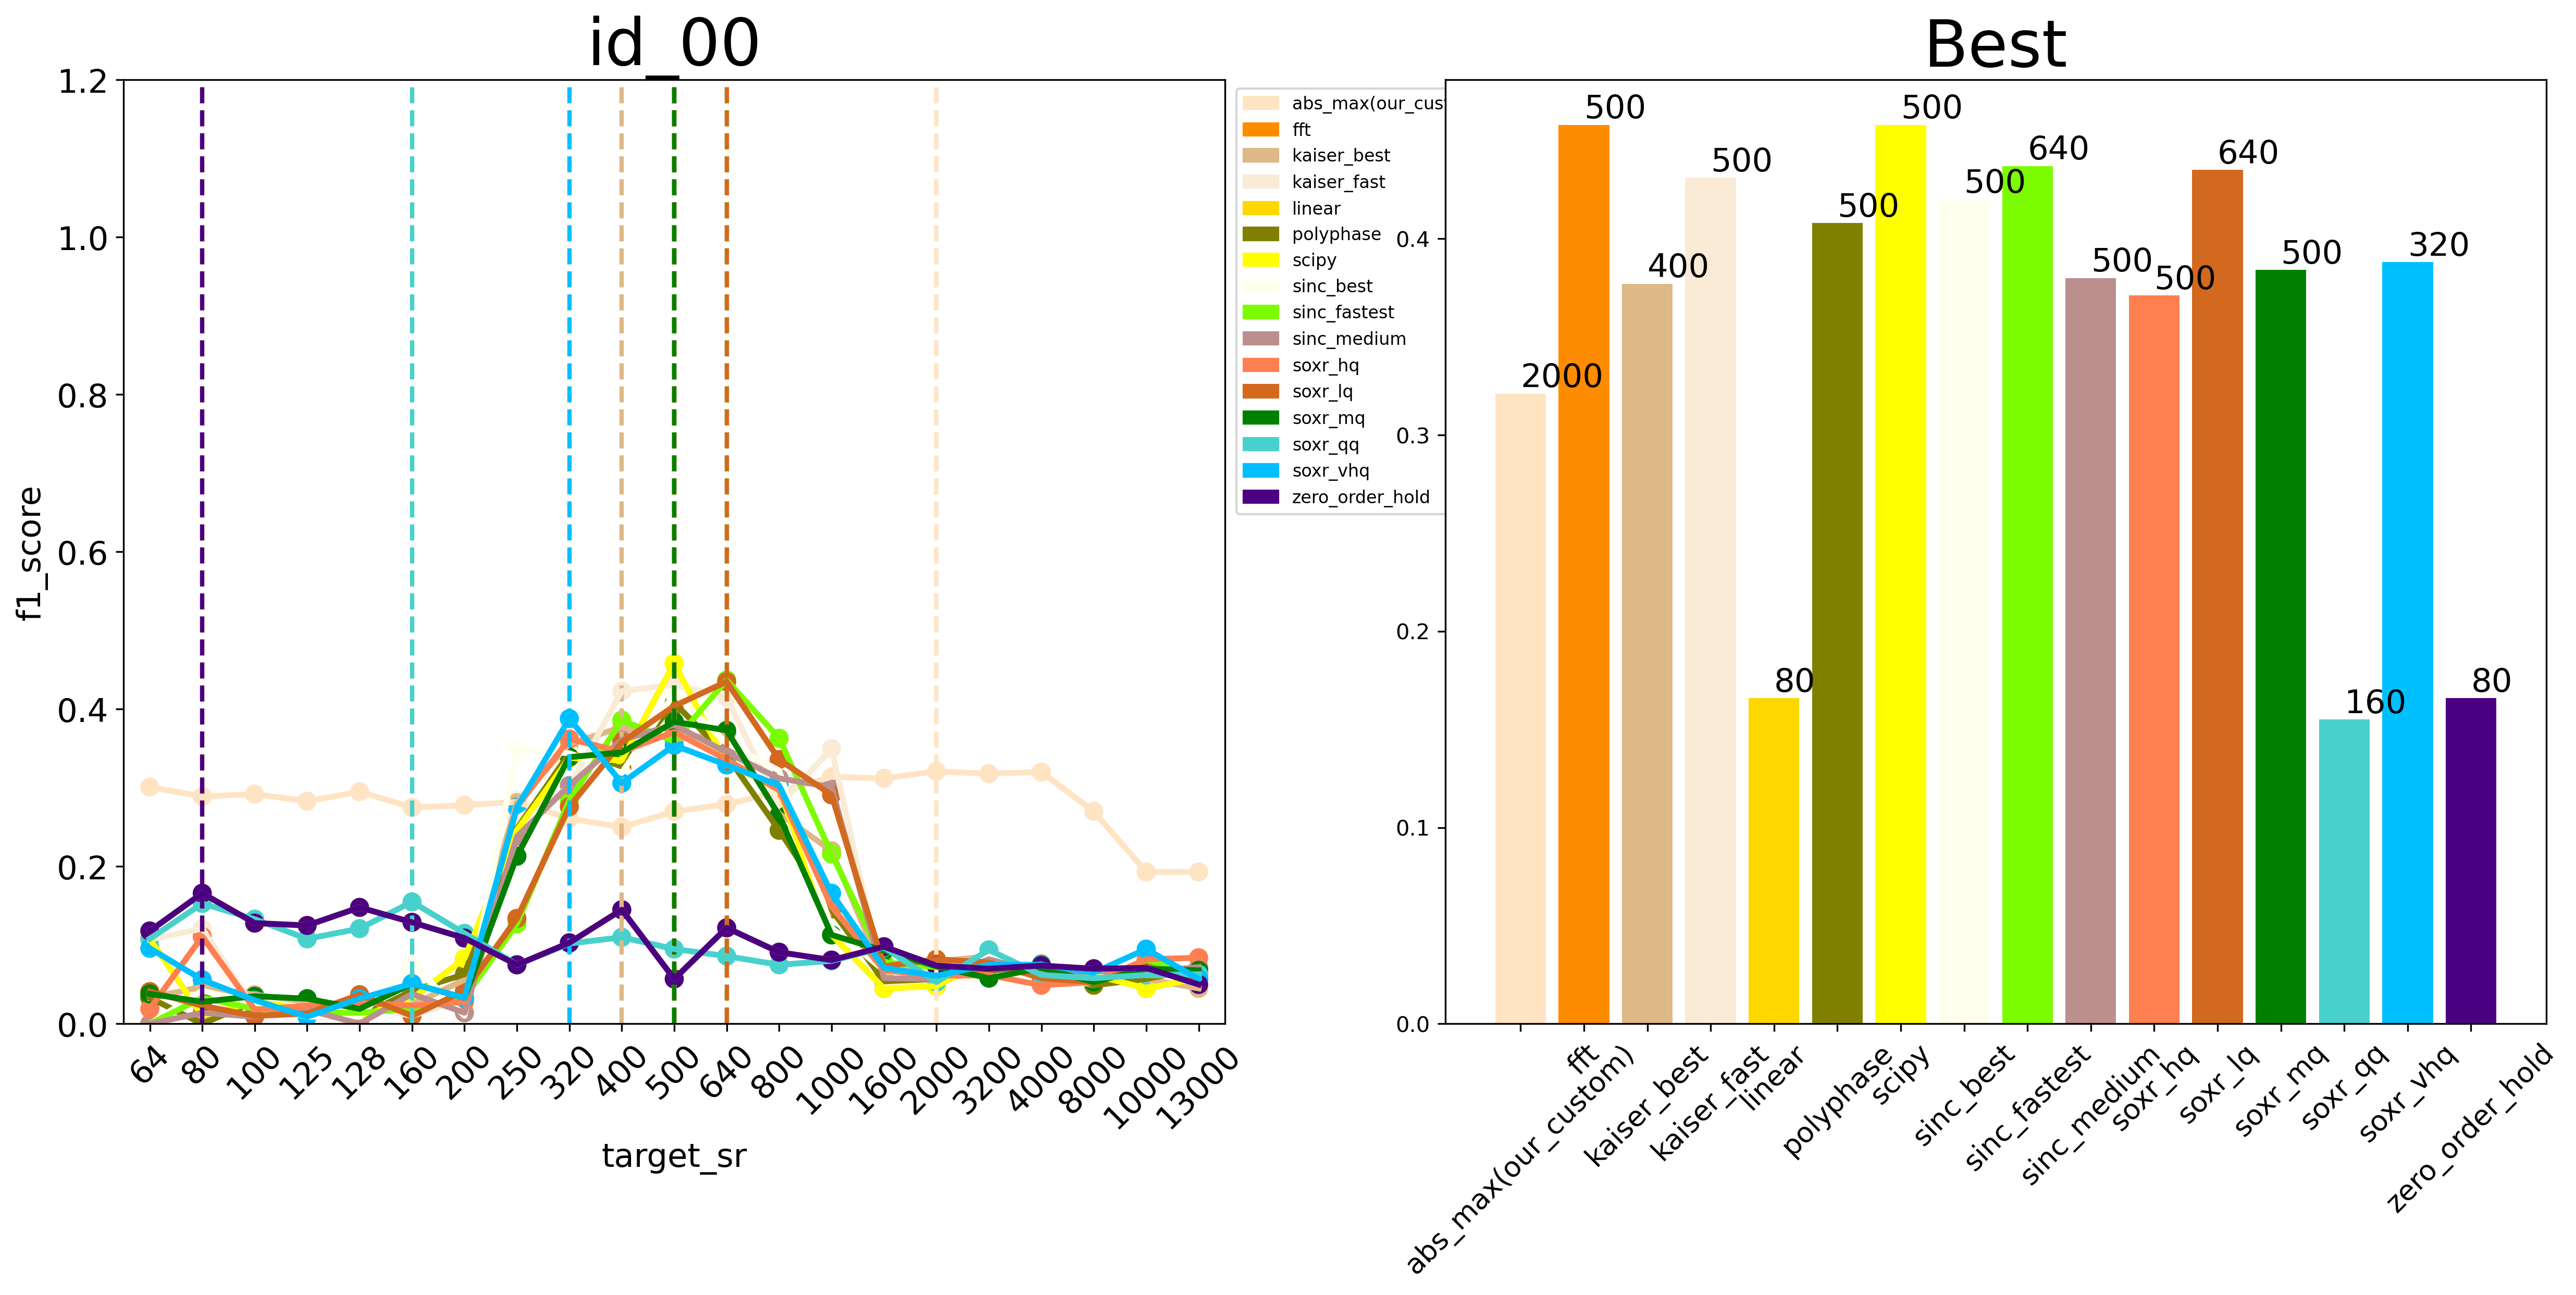

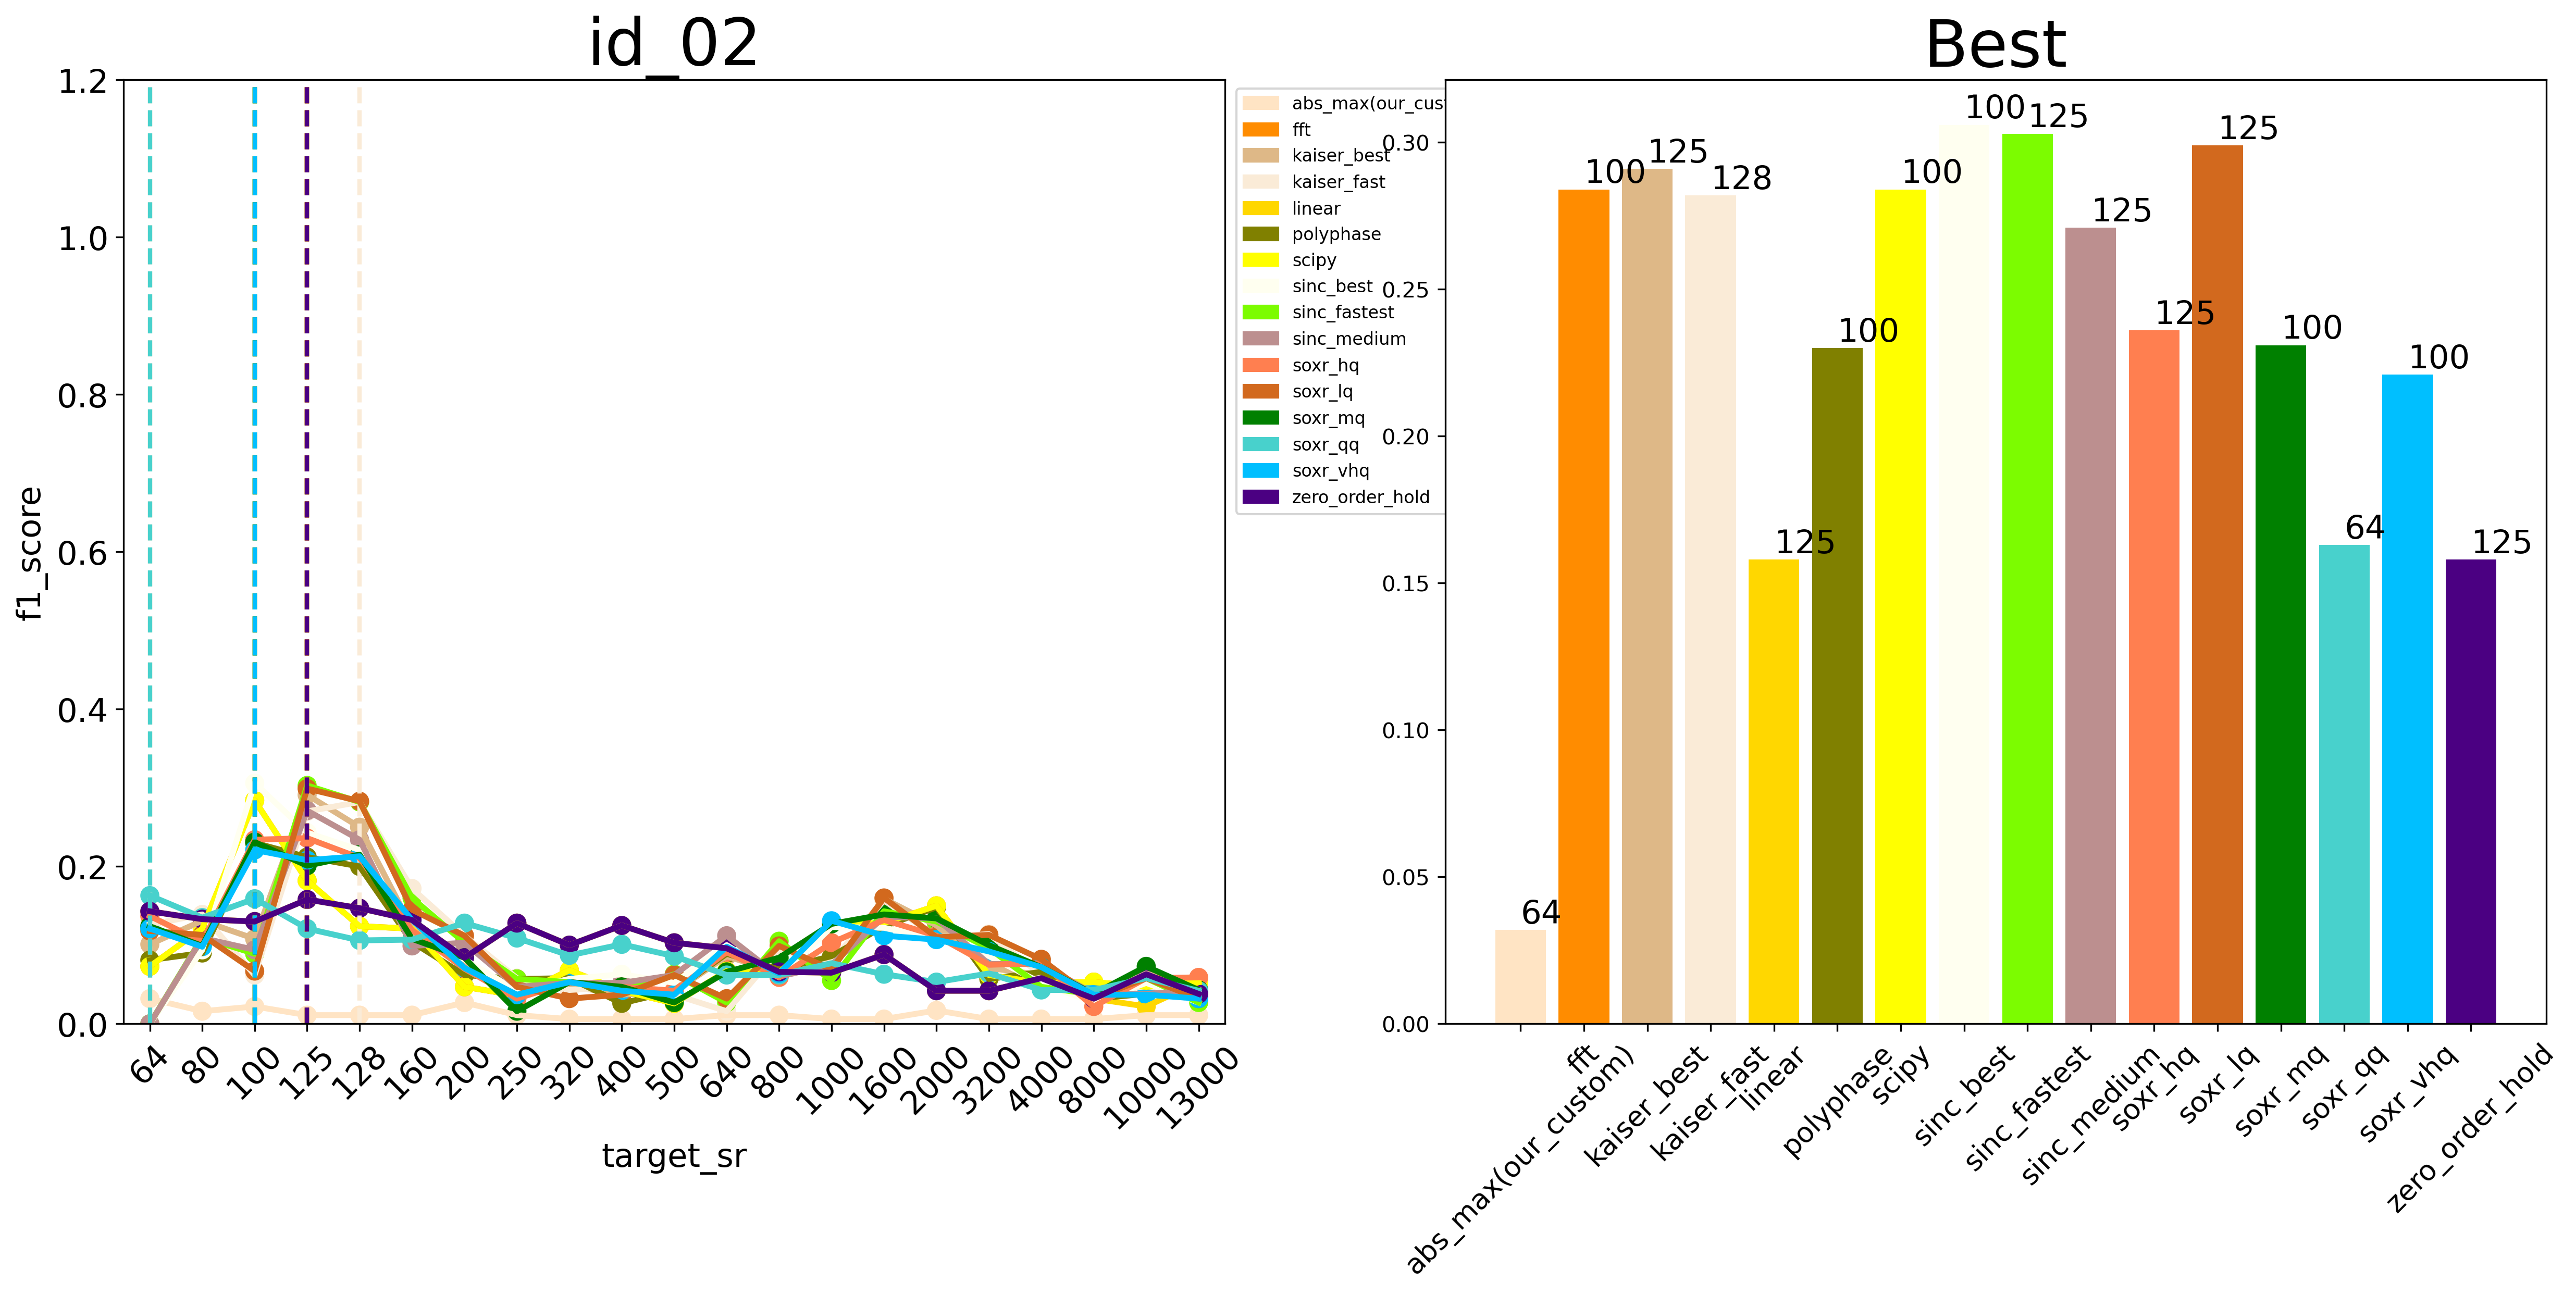

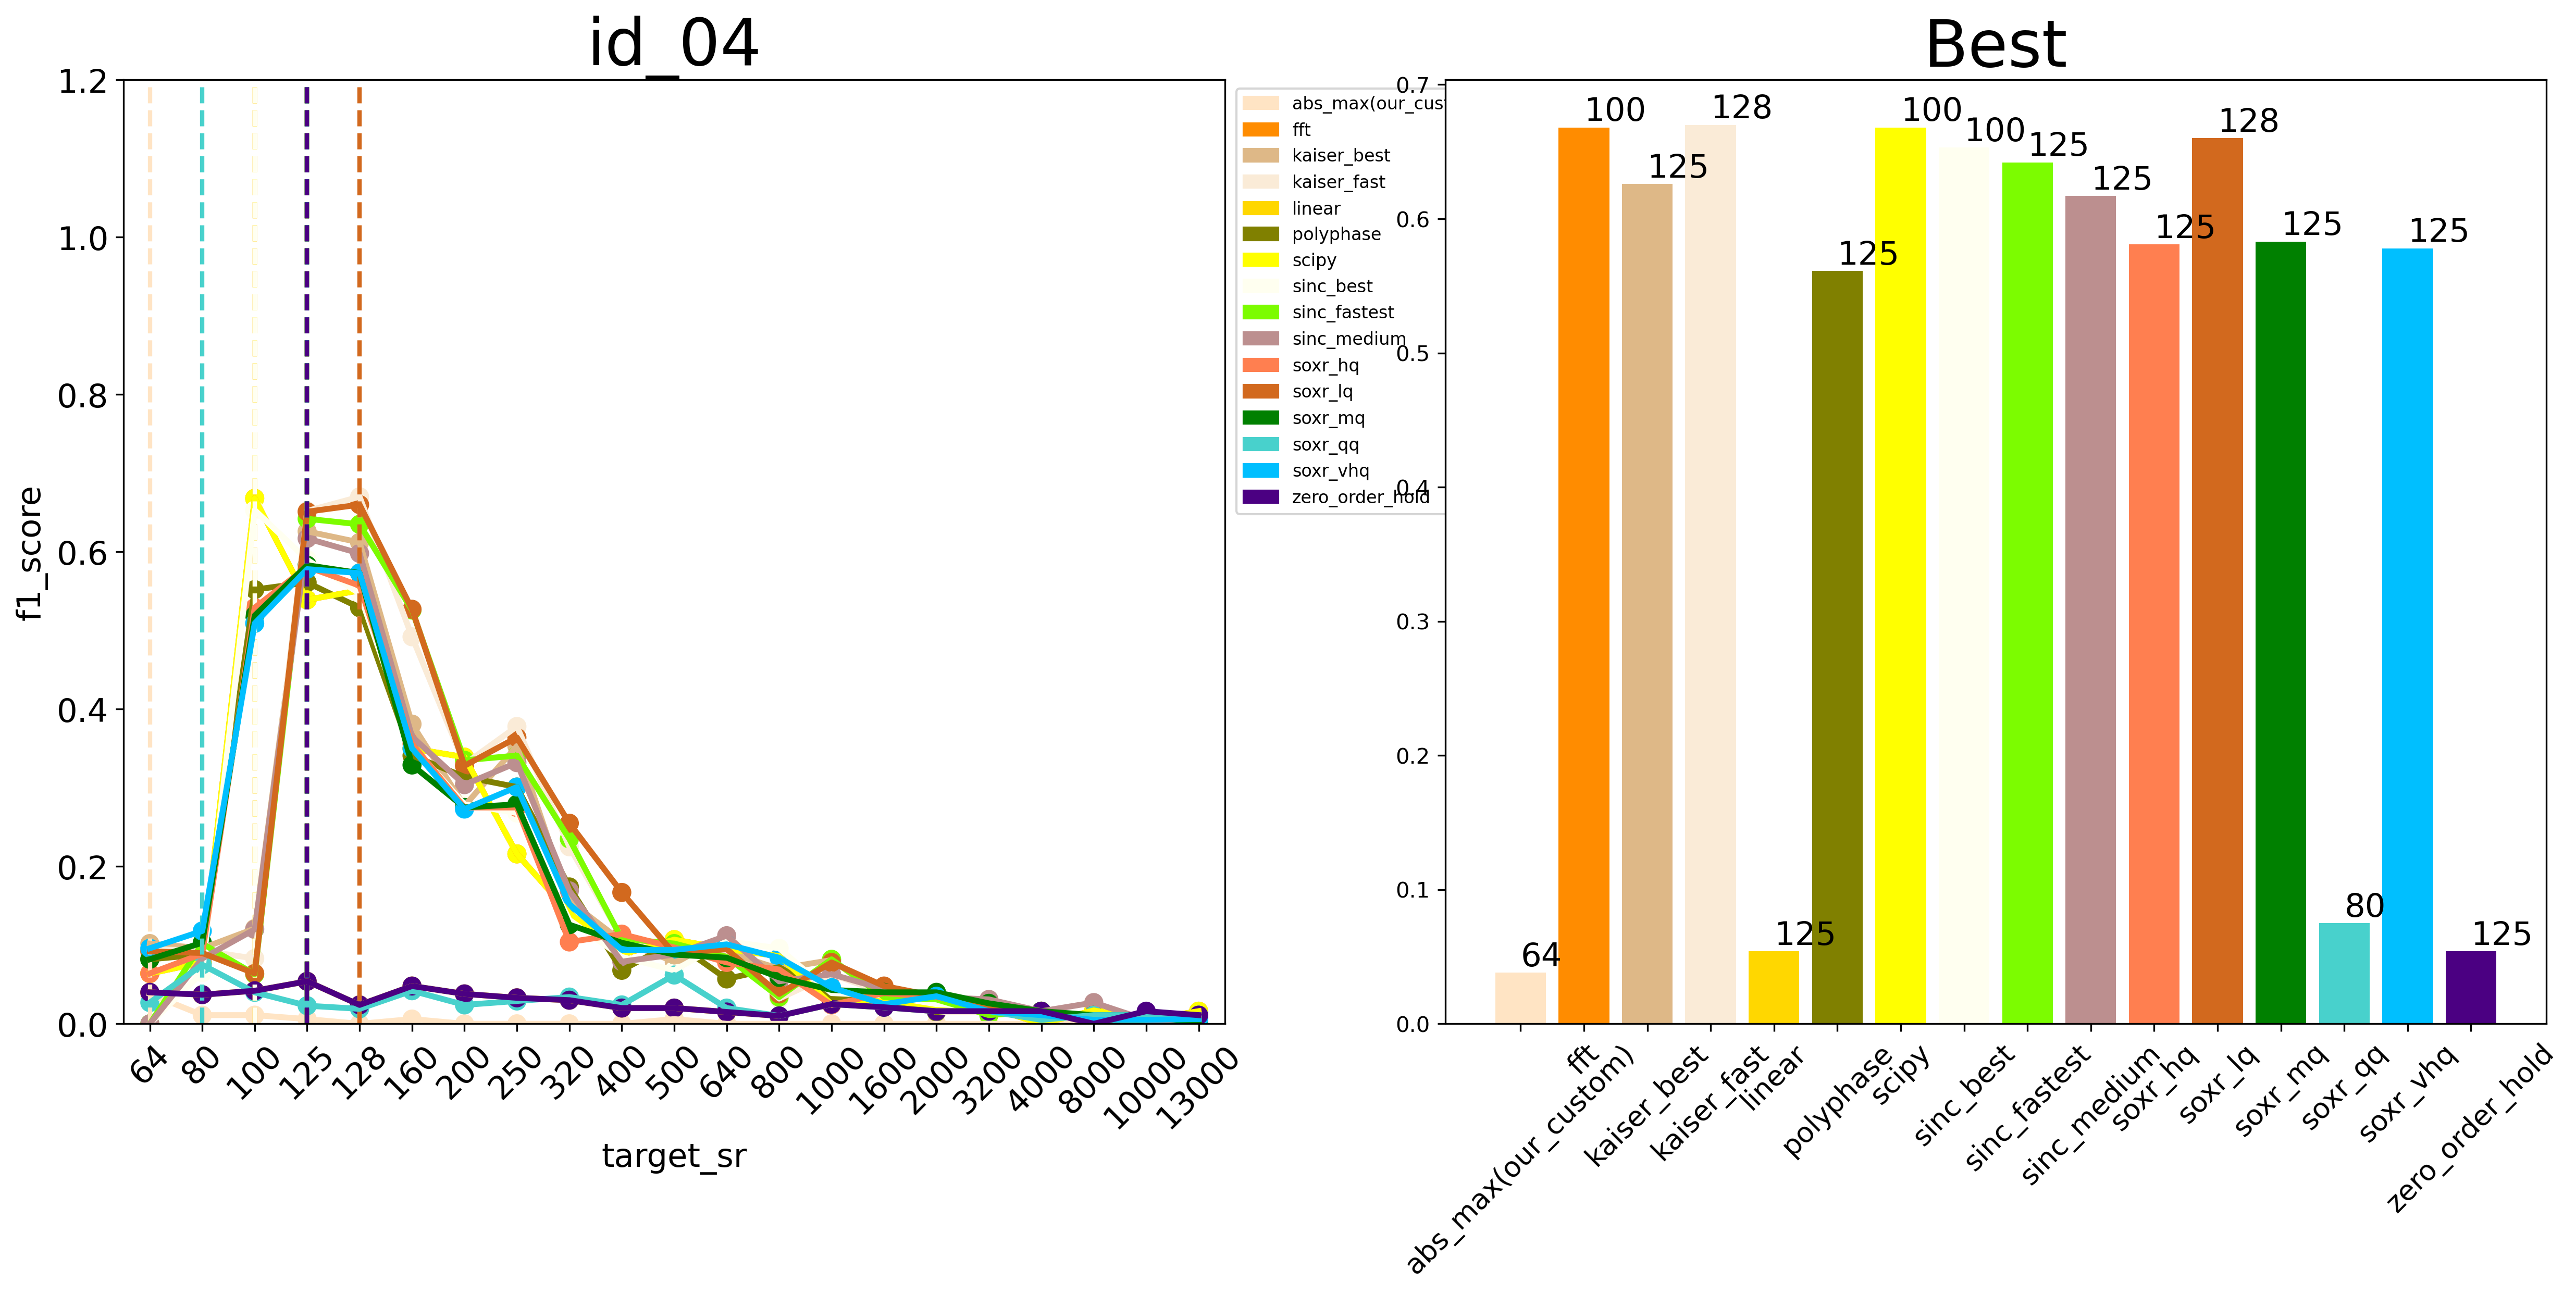

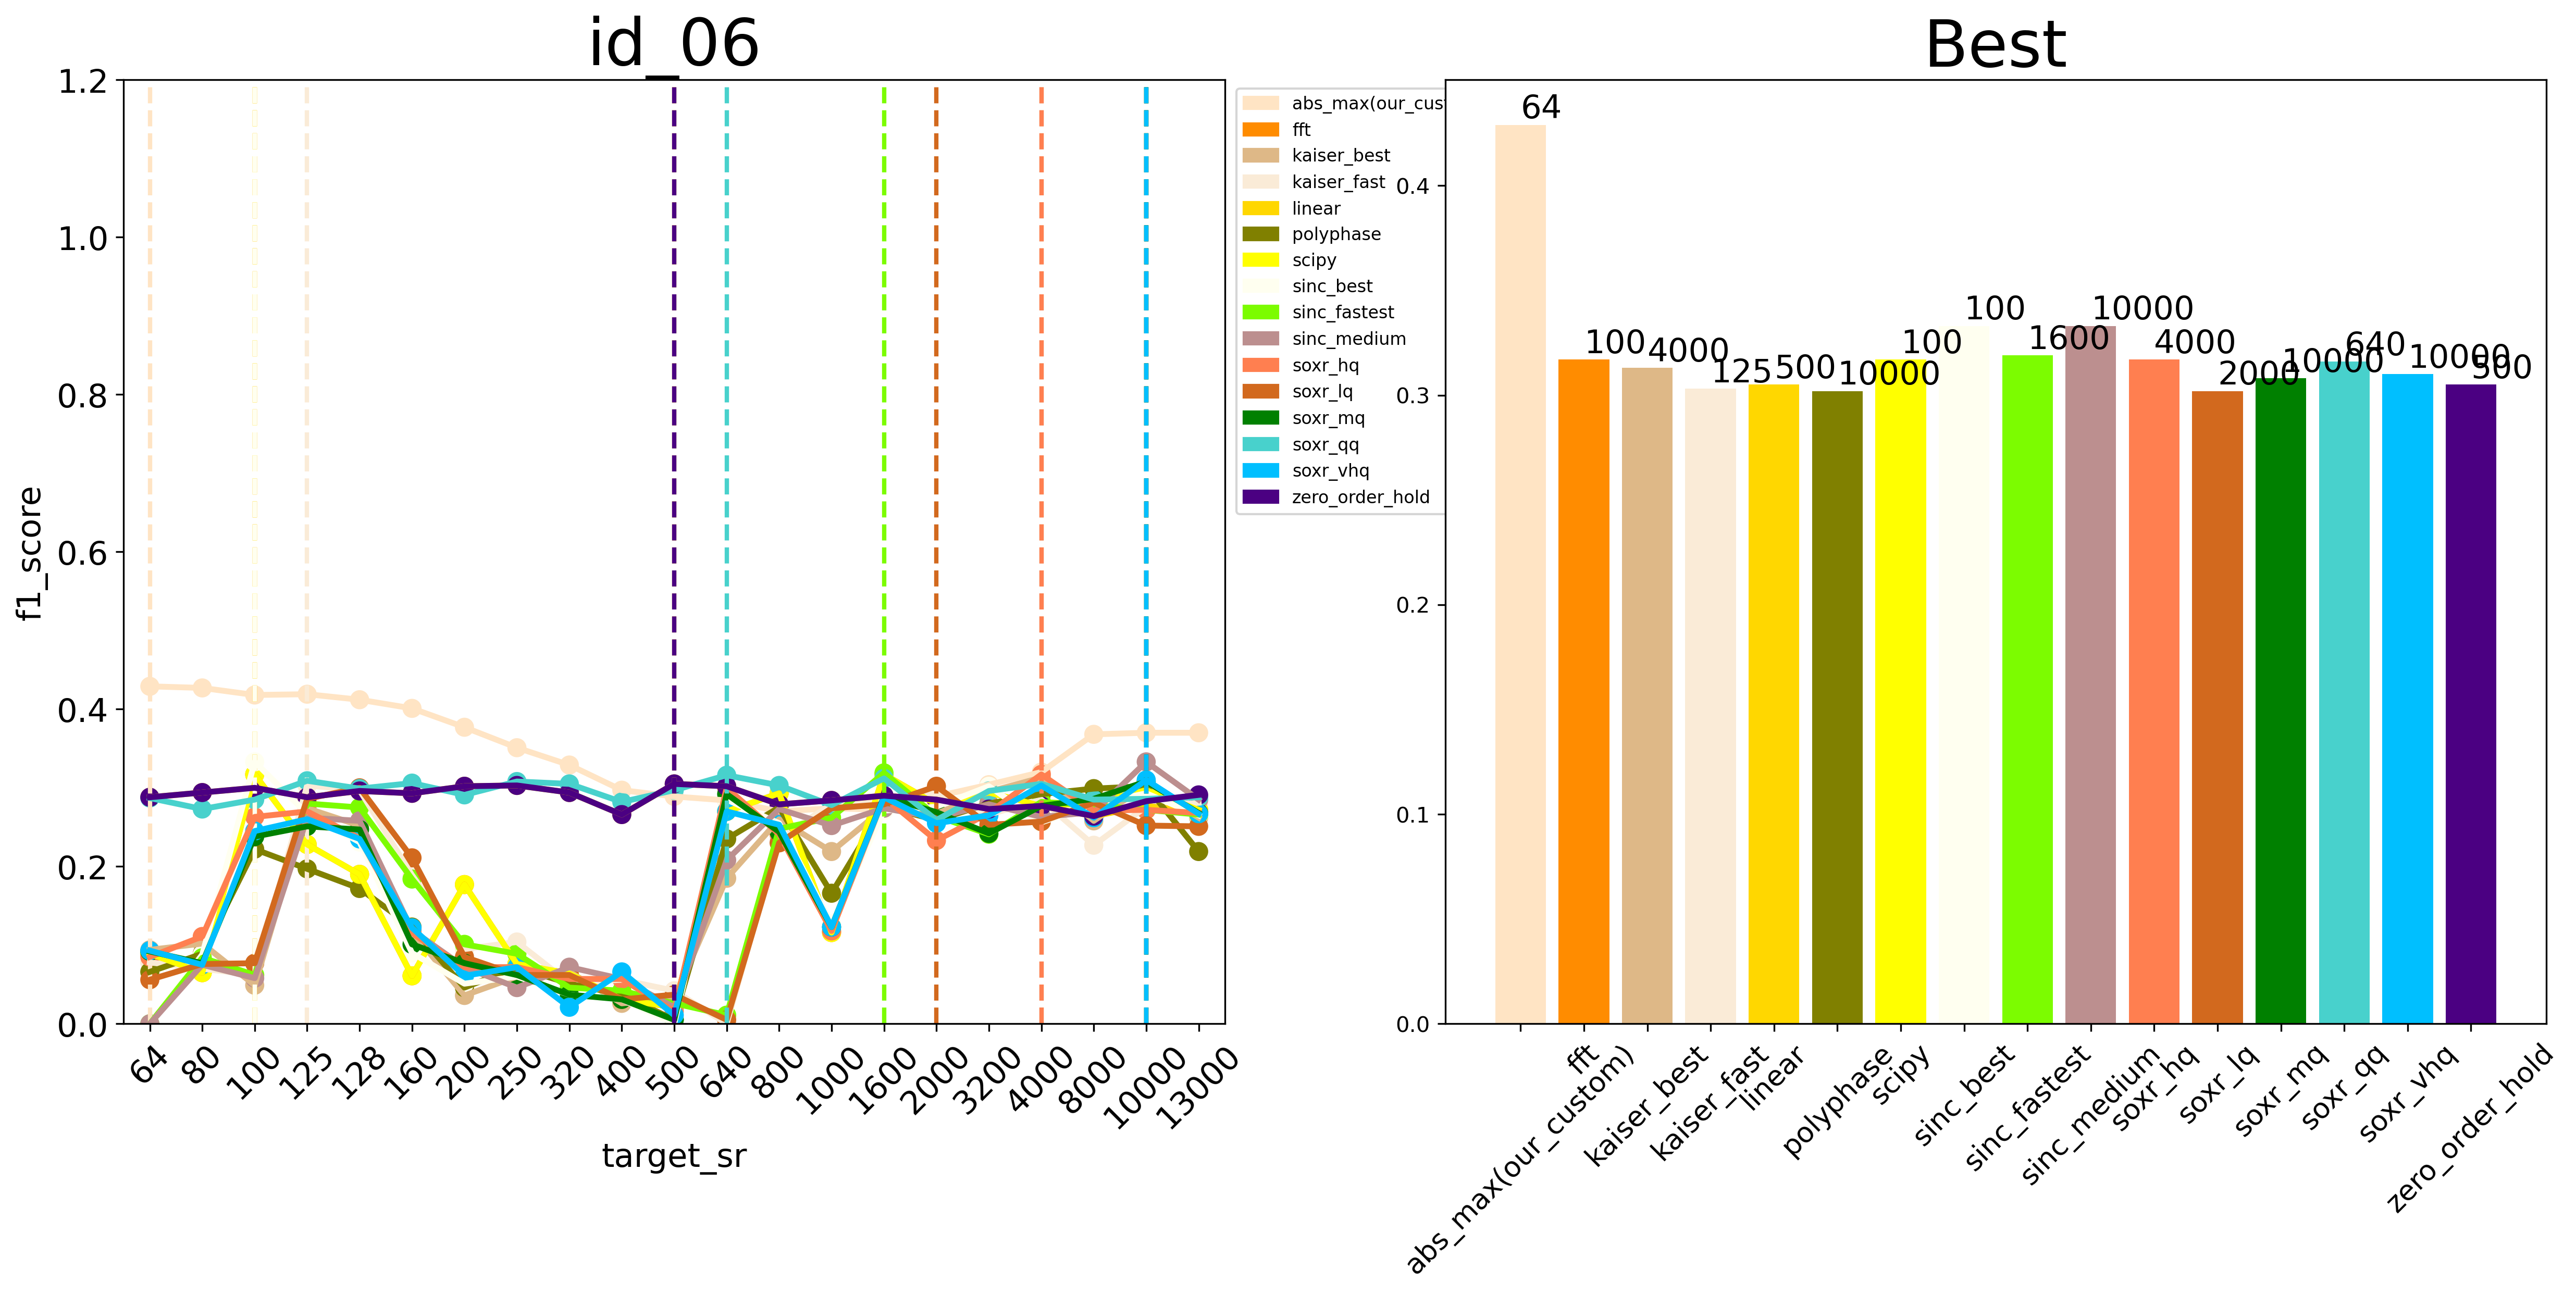

In [6]:
ID_li = sorted(list(set(data['Model'])))

for ID in ID_li:
    fan0_per_model(ID)